#BY R178466Z WEBSTER NHIDZA
#BY R178465U WELLINGTON NHIDZA

# HPV SCREENING (CERVICAL CANCER) DISEASE PREDICTION

#  PART 1: conventional means of accessing relevant data and building datasets

**HPV DATASET  WAS COLLECTED FROM https://zenodo.org/record/1409790#.YMHfOPkzZhE **
 
**OTHER IMAGES WERE COLLECTED FROM https://ai.stanford.edu/~jkrause/cars/car_dataset.html
car images obtained from https://ai.stanford.edu/~jkrause/cars/car_dataset.html
http://host.robots.ox.ac.uk/pascal/VOC
Person images obtained from http://www.briancbecker.com/blog/research/pubfig83-lfw-dataset
**

In [ ]:
from random import randint
import os
import numpy as np 
import pandas as pd
import cv2
 
import matplotlib.pyplot as plot
import matplotlib.gridspec as gridspec
import seaborn as sns
 
from IPython.display import SVG
 
from sklearn.utils import shuffle
from sklearn.preprocessing import MaxAbsScaler
 
import keras
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
 
from sklearn.model_selection import train_test_split



**Helper Function For Image Extraction**


In [ ]:
image_size = (128, 128)

In [ ]:
train_images_labels = []
 
def get_images(directory, type_id):
    Images = []
    for dirname, _, filenames in os.walk(directory):
        current, total = 0, len(filenames)
        print(dirname)
        for filename in sorted(filenames):
            image = cv2.imread(os.path.join(dirname, filename))
            image = cv2.resize(image,image_size)
            if image.all() == None:
                continue
            Images.append(image)
            train_images_labels.append(type_id)
            current += 1
            if current % (int(total / 10)) == 0:
                print(round(current/total * 100) , "%")
       
    return Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWisy-LESFD7FBDwhDMSJiMNixpOFolZ11gOcNzAJvVbczpgsiN5iC8
Mounted at /content/drive


**Load Cervical Cancer Images**

In [ ]:
cervical_train_images = get_images('/content/drive/My Drive/dataset/train/train', 1)
cervical_train_images.extend(get_images('/content/drive/My Drive/dataset/additional_Type_1_v2', 1))
cervical_train_images.extend(get_images('/content/drive/My Drive/dataset/additional_Type_2_v2', 1))
cervical_train_images.extend(get_images('/content/drive/My Drive/dataset/additional_Type_3_v2', 1))
print('Cervical images: ', len(cervical_train_images))

/content/drive/My Drive/dataset/train/train
/content/drive/My Drive/dataset/train/train/Type_1
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
/content/drive/My Drive/dataset/train/train/Type_2
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
/content/drive/My Drive/dataset/train/train/Type_3
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
/content/drive/My Drive/dataset/additional_Type_1_v2
/content/drive/My Drive/dataset/additional_Type_1_v2/Type_1
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
/content/drive/My Drive/dataset/additional_Type_2_v2
/content/drive/My Drive/dataset/additional_Type_2_v2/Type_2
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
/content/drive/My Drive/dataset/additional_Type_3_v2
/content/drive/My Drive/dataset/additional_Type_3_v2/Type_3
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
Cervical images:  7675


**SHOW A SAMPLE OF IMAGES**

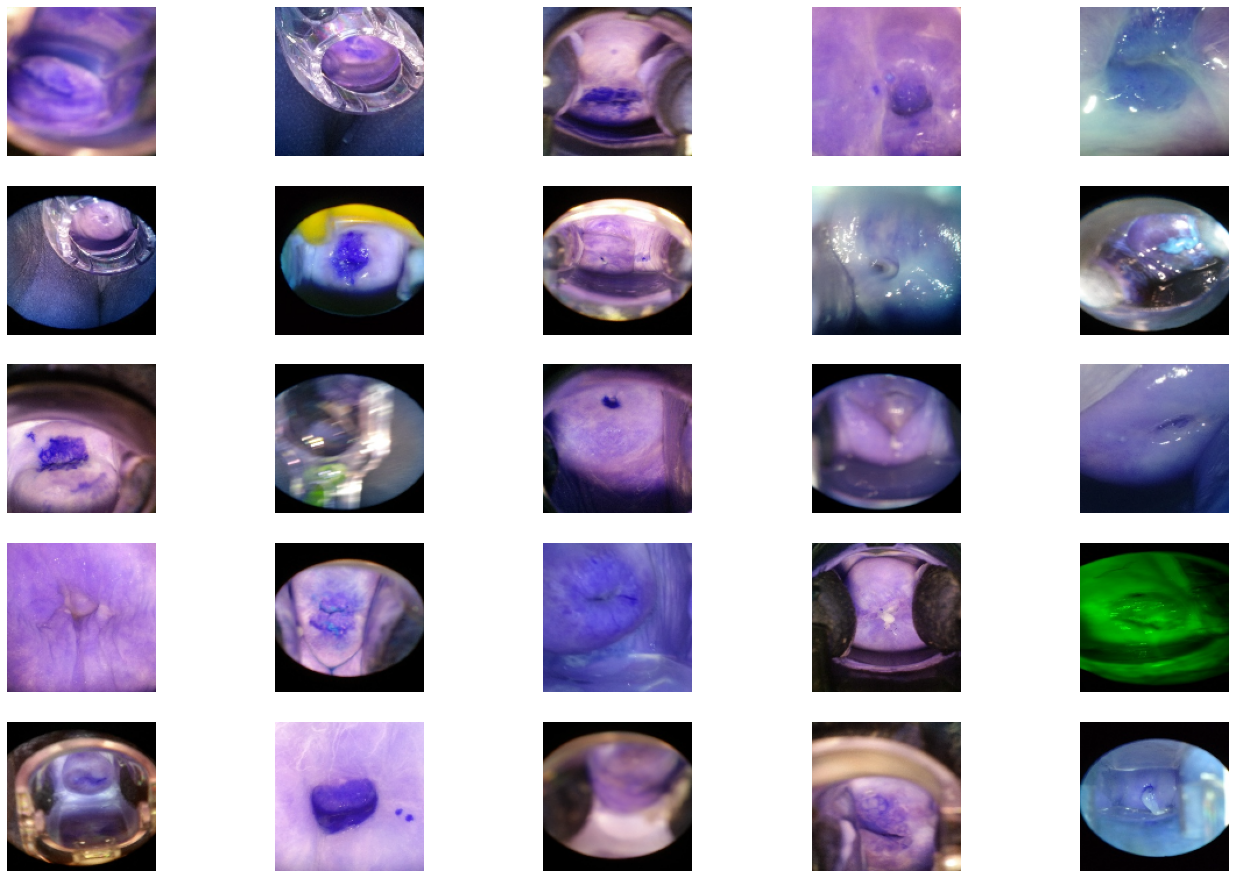

In [ ]:
 
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(cervical_train_images))
        image = cervical_train_images[rnd_number]
        ax[i,j].imshow(image)
        ax[i,j].axis('off')

**Load The Other Images**

In [ ]:
other_train_images =  get_images('/content/drive/My Drive/natural_images/natural_images/', 0)
 
print('Not Cervical images: ', len(other_train_images))

/content/drive/My Drive/natural_images/natural_images/
/content/drive/My Drive/natural_images/natural_images/flower
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
/content/drive/My Drive/natural_images/natural_images/motorbike
10 %
20 %
30 %
40 %
49 %
59 %
69 %
79 %
89 %
99 %
/content/drive/My Drive/natural_images/natural_images/dog
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
/content/drive/My Drive/natural_images/natural_images/person
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
89 %
99 %
/content/drive/My Drive/natural_images/natural_images/airplane
10 %
20 %
30 %
40 %
50 %
59 %
69 %
79 %
89 %
99 %
/content/drive/My Drive/natural_images/natural_images/fruit
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
/content/drive/My Drive/natural_images/natural_images/car
10 %
20 %
30 %
40 %
50 %
60 %
69 %
79 %
89 %
99 %
/content/drive/My Drive/natural_images/natural_images/cat
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
89 %
99 %
Not Cervical images:  6899


**Show NOT Train Cervical Cancer Samples**

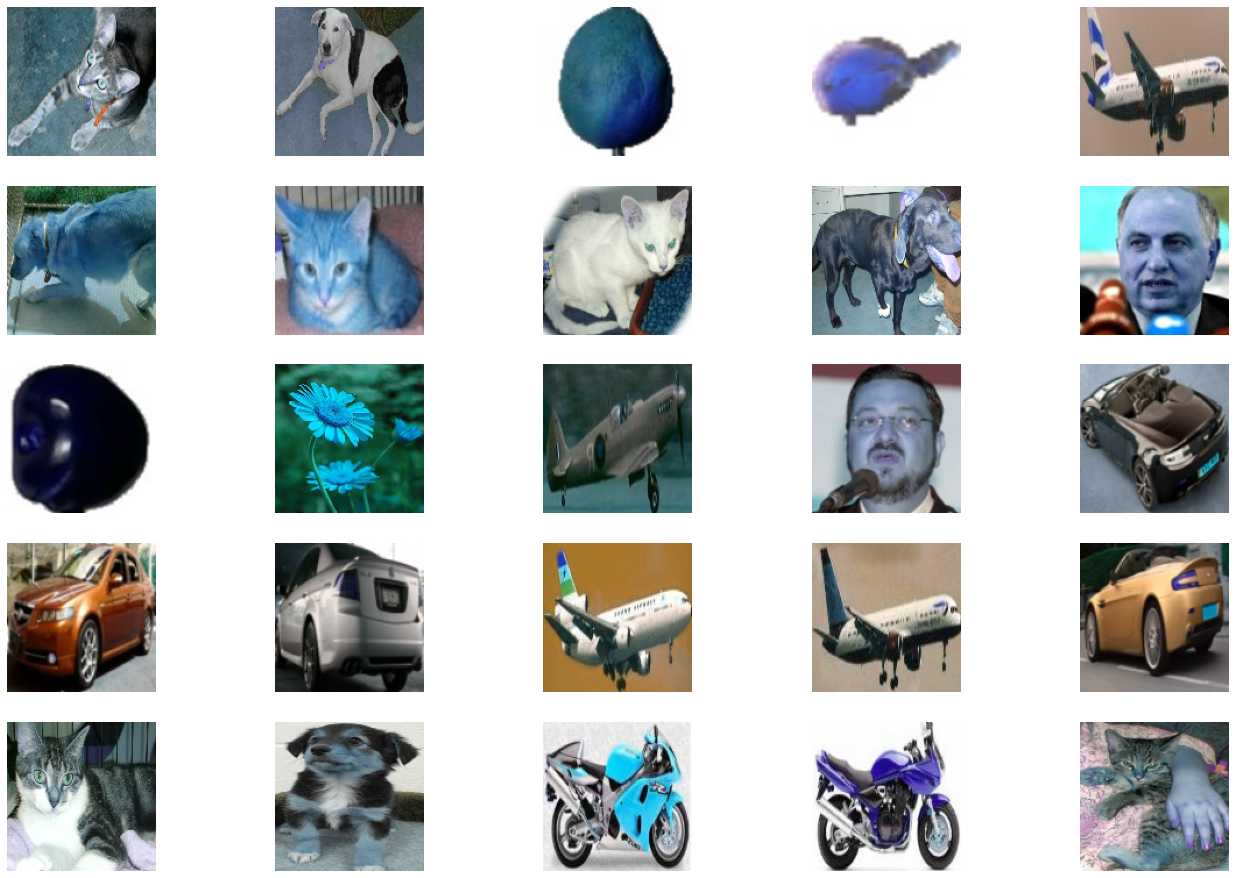

In [ ]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(other_train_images))
        image = other_train_images[rnd_number]
        ax[i,j].imshow(image)
        ax[i,j].axis('off')

**Combine Data Sets**

In [ ]:
train_images = cervical_train_images + other_train_images
 
print('Total train images: ', len(train_images))
print('Total train ids: ', len(train_images_labels))

Total train images:  14574
Total train ids:  14574


# PART 2: DATA CLEANING

In [ ]:
def data_cleaning_image_resizing():
  basewidth = 300
  img = Image.open(train_images)
  wpercent = (basewidth / float(img.size[0]))
  hsize = int((float(img.size[1]) * float(wpercent)))
  img1 = img.resize((basewidth, hsize), Image.ANTIALIAS)

  baseheight = 560
  img = Image.open(train_images)
  hpercent = (baseheight / float(img.size[1]))
  wsize = int((float(img.size[0]) * float(hpercent)))
  img = img.resize((wsize, baseheight), Image.ANTIALIAS)
  resized_image=img+img1
  return resized_image

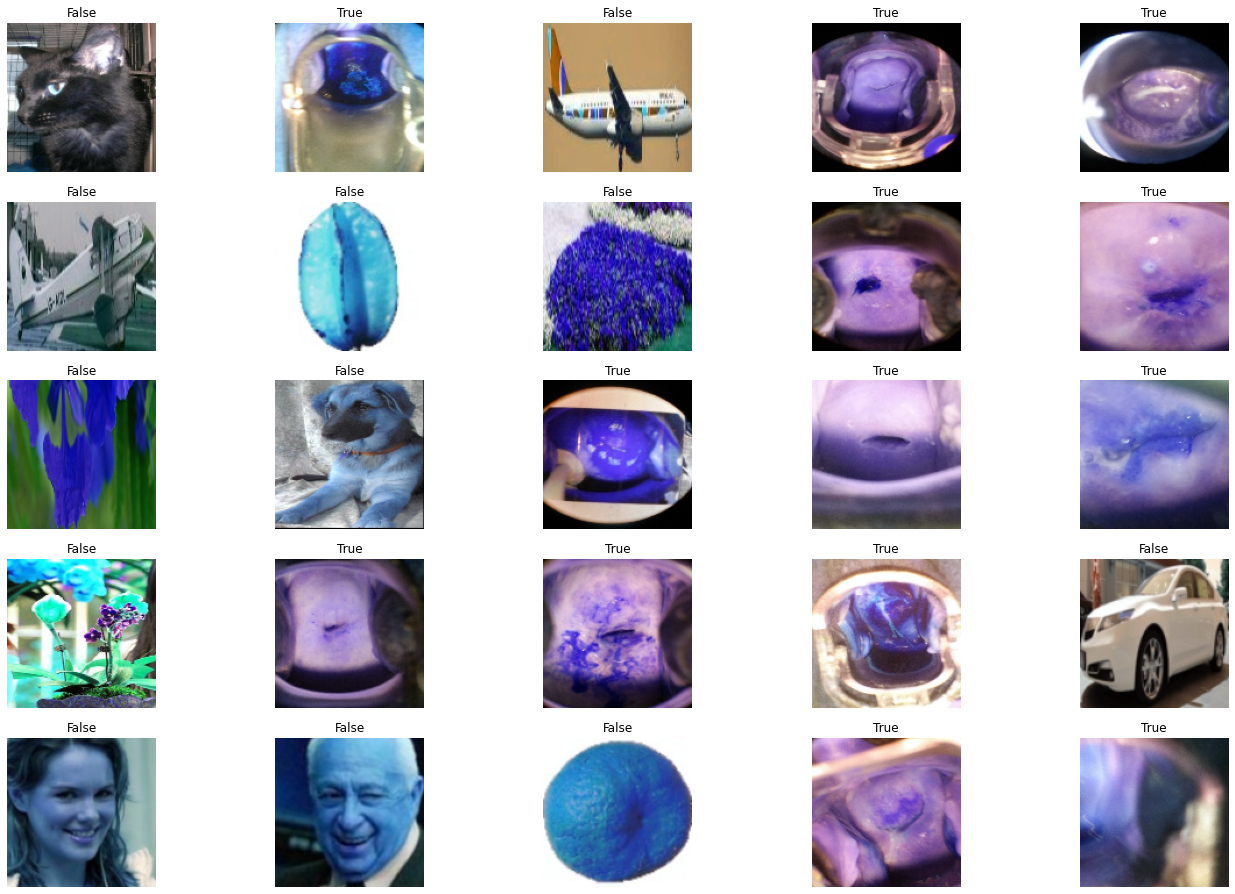

In [ ]:
def show_resized_images(id):
    if id == 1:
        return "True"
    else: 
        return "False"
 
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_images))
        image = train_images[rnd_number]
        type_id = train_images_labels[rnd_number]
        ax[i,j].imshow(image)
        ax[i,j].set_title(show_resized_images(type_id))
        ax[i,j].axis('off')

In [ ]:
pip install np_utils

     |████████████████████████████████| 61kB 3.5MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-cp37-none-any.whl size=57133 sha256=0e97700f84163b4f80e34a6706feeb81013310ed226ff77a3714738ade6a2f91
  Stored in directory: /root/.cache/pip/wheels/92/4b/81/206efd0d01330a96f3aebe5021d2d5f0b264b7ade827c306ef
Successfully built np-utils


# PART 2: Creating models or algorithms



**Split Data Into Two Separate Parts For Training And Testing**

In [ ]:
 
from keras.utils.np_utils import to_categorical
x_train, x_test, y_train, y_test = train_test_split(train_images, train_images_labels, test_size=0.25, random_state=17)
 
x_train = np.array(x_train) 
x_test = np.array(x_test)
 
y_train = np.array(y_train) 
y_train = keras.utils.np_utils.to_categorical(y_train)
 
y_test = np.array(y_test)
y_test = keras.utils.np_utils.to_categorical(y_test)
 
print("Shape of train images:",x_train.shape)
print("Shape of train labels:",y_train.shape)
 
print("Shape of test images:",x_test.shape)
print("Shape of test labels:",y_test.shape)

Shape of train images: (10930, 128, 128, 3)
Shape of train labels: (10930, 2)
Shape of test images: (3644, 128, 128, 3)
Shape of test labels: (3644, 2)


In [ ]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Activation, merge, Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers

In [ ]:
 
conf = dict()
 
conf['num_classes'] = 2
conf['num_channels'] = 3
conf['num_epochs'] = 4
conf['batch_size'] = 64
conf['validation_split'] = 0.35
conf['num_workers'] = 8
conf['image_shape'] = (128, 128)
conf['pooling_strategy'] = MaxPooling2D

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 124, 124, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 32)        0

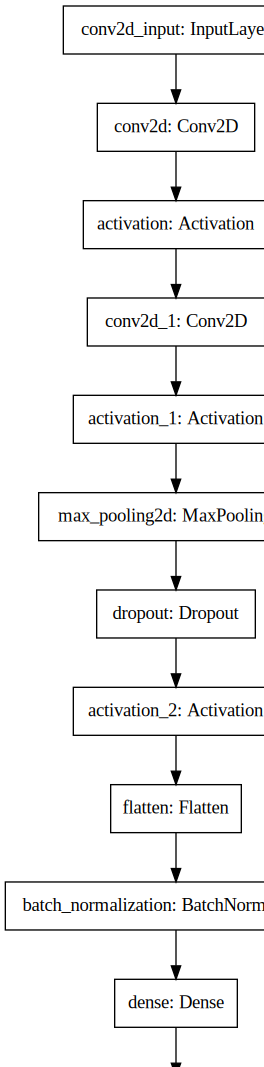

In [ ]:
def create_model(conf):
    
    num_channels = conf['num_channels']
    num_classes = conf['num_classes']
    img_rows, img_cols = conf['image_shape']
    PoolingStrategy = conf['pooling_strategy']
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='valid',input_shape=(img_rows, img_cols, num_channels)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3))) 
    model.add(Activation('relu'))
    model.add(PoolingStrategy(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
 
    adam = optimizers.Adam(lr=0.0001, decay=1e-6)
 
    model.compile(loss='categorical_crossentropy',
                  optimizer=adam,
                  metrics=['accuracy'])
    
    
    return model
 
model = create_model(conf)
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
#Utils.plot_model(model,to_file='model.png',show_shapes=True)

# PART 3:Training the model or use of the algorithm

In [ ]:
 
training_history = model.fit(x = x_train,
                             y = y_train, 
                             validation_split=conf['validation_split'],  
                             batch_size=conf['batch_size'], 
                             epochs = conf['num_epochs'], 
                             workers =  conf['num_workers'], use_multiprocessing=True)

Epoch 1/4
111/111 [==============================] - 409s 4s/step - loss: 0.0278 - accuracy: 0.9939 - val_loss: 0.5996 - val_accuracy: 0.9524
Epoch 2/4
111/111 [==============================] - 402s 4s/step - loss: 0.0549 - accuracy: 0.9927 - val_loss: 0.1693 - val_accuracy: 0.9835
Epoch 3/4
111/111 [==============================] - 402s 4s/step - loss: 0.0514 - accuracy: 0.9930 - val_loss: 0.1774 - val_accuracy: 0.9744
Epoch 4/4
111/111 [==============================] - 403s 4s/step - loss: 0.0278 - accuracy: 0.9938 - val_loss: 0.1967 - val_accuracy: 0.9916


In [ ]:
training_history

In [ ]:
 training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

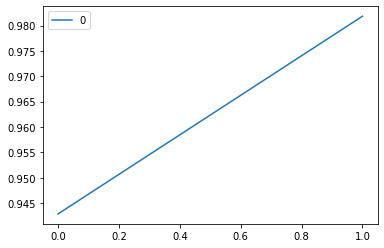

In [ ]:
 pd.DataFrame(training_history.history['accuracy']).plot()

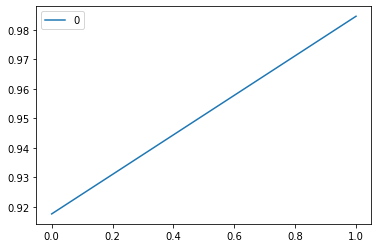

In [ ]:
 pd.DataFrame(training_history.history['val_accuracy']).plot()

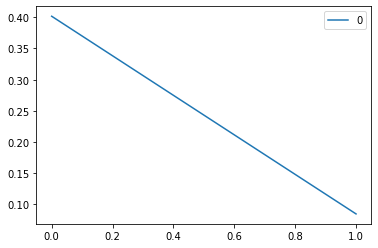

In [ ]:
 pd.DataFrame(training_history.history['loss']).plot()

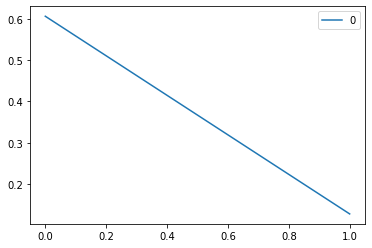

In [ ]:
 pd.DataFrame(training_history.history['val_loss']).plot()

# PART 5: MODEL EVALUATION

In [ ]:
 
loss, accuracy = model.evaluate(x_test, y_test)
 
print(f"Accuracy for test: {accuracy}")
print(f"Loss for test: {loss}")

114/114 [==============================] - 44s 386ms/step - loss: 0.1136 - accuracy: 0.9767
Accuracy for test: 0.97667396068573
Loss for test: 0.11356167495250702


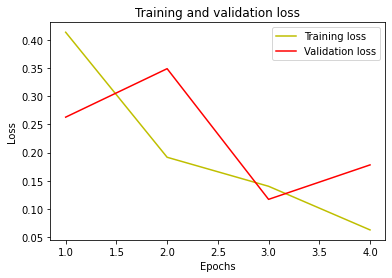

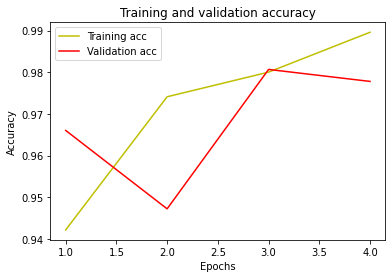

In [ ]:
#plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
 
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
 
 
acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
 
 #from keras.models import load_model
 #saved_model = load_model('models/best_model.h5')
 
# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
 
# Making the Confusion Matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
 
#sns.heatmap(cm, annot=True)

# PART 6: Optimization techniques

In [ ]:
from keras import regularizers
from tensorflow.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense

In [ ]:
conf = dict()
 
conf['num_classes'] = 2
conf['num_channels'] = 3
conf['num_epochs'] = 8
conf['batch_size'] = 64
conf['validation_split'] = 0.35
conf['num_workers'] = 8
conf['image_shape'] = (128, 128)
conf['pooling_strategy'] = MaxPooling2D

**Added 3 more layers to the Model**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 124, 124, 16)      4624      
_________________________________________________________________
activation_9 (Activation)    (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 122, 122, 16)      2320      
_________________________________________________________________
activation_10 (Activation)   (None, 122, 122, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 120, 120, 16)     

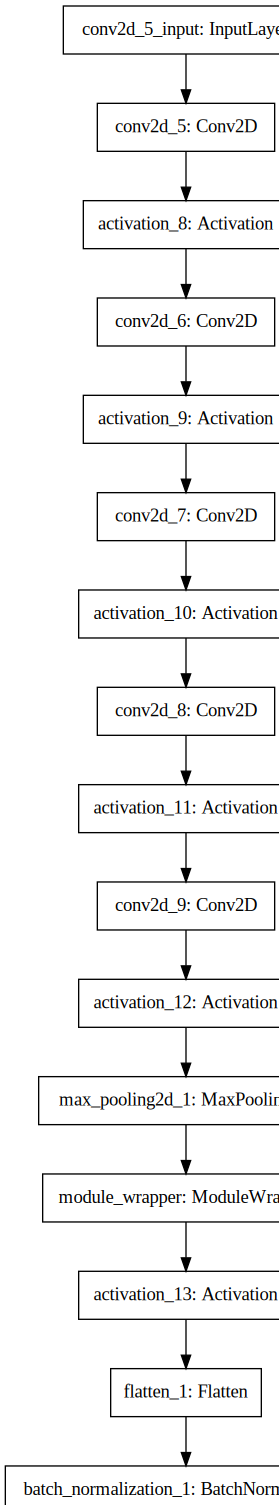

In [ ]:
def create_model(conf):
    
    num_channels = conf['num_channels']
    num_classes = conf['num_classes']
    img_rows, img_cols = conf['image_shape']
    PoolingStrategy = conf['pooling_strategy']
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='valid',input_shape=(img_rows, img_cols, num_channels)))
    model.add(Activation('relu'))
    model.add(Conv2D(16, (3, 3))) 
    model.add(Activation('relu'))
    model.add(Conv2D(16, (3, 3))) 
    model.add(Activation('relu'))
    model.add(Conv2D(16, (3, 3))) 
    model.add(Activation('relu'))
    model.add(Conv2D(16, (3, 3))) 
    model.add(Activation('relu'))
    model.add(PoolingStrategy(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
 
    adam = optimizers.Adam(lr=0.0001, decay=1e-6)
 
    model.compile(loss='categorical_crossentropy',
                  optimizer=adam,
                  metrics=['accuracy'])
    
    
    return model
 
model = create_model(conf)
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
#Utils.plot_model(model,to_file='model.png',show_shapes=True)

**Training the Model**

In [ ]:
training_history = model.fit(x = x_train,
                             y = y_train, 
                             validation_split=conf['validation_split'],  
                             batch_size=conf['batch_size'], 
                             epochs = conf['num_epochs'], 
                             workers =  conf['num_workers'], use_multiprocessing=True)

Epoch 1/8
111/111 [==============================] - 531s 5s/step - loss: 0.3539 - accuracy: 0.9026 - val_loss: 0.5559 - val_accuracy: 0.8947
Epoch 2/8
111/111 [==============================] - 530s 5s/step - loss: 0.0881 - accuracy: 0.9774 - val_loss: 0.1135 - val_accuracy: 0.9749
Epoch 3/8
111/111 [==============================] - 526s 5s/step - loss: 0.0579 - accuracy: 0.9850 - val_loss: 0.4183 - val_accuracy: 0.9294
Epoch 4/8
111/111 [==============================] - 526s 5s/step - loss: 0.0250 - accuracy: 0.9904 - val_loss: 0.0619 - val_accuracy: 0.9864
Epoch 5/8
111/111 [==============================] - 526s 5s/step - loss: 0.0194 - accuracy: 0.9948 - val_loss: 0.0685 - val_accuracy: 0.9822
Epoch 6/8
111/111 [==============================] - 527s 5s/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0829 - val_accuracy: 0.9841
Epoch 7/8
111/111 [==============================] - 528s 5s/step - loss: 0.0212 - accuracy: 0.9921 - val_loss: 0.0653 - val_accuracy: 0.9864
Epoch 

**Model Evaluation**

In [ ]:
 
loss, accuracy = model.evaluate(x_test, y_test)
 
print(f"Accuracy for test: {accuracy}")
print(f"Loss for test: {loss}")

114/114 [==============================] - 55s 481ms/step - loss: 0.0805 - accuracy: 0.9833
Accuracy for test: 0.9832601547241211
Loss for test: 0.08045560121536255


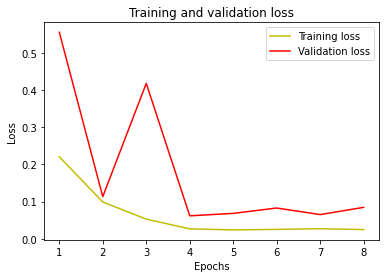

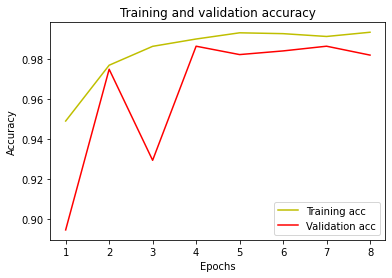

In [ ]:
#plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt

loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 #from keras.models import load_model
 #saved_model = load_model('models/best_model.h5')

# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)

#sns.heatmap(cm, annot=True)

In [ ]:
model.save('/content/drive/My Drive/cervical.h5')